In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree



In [ ]:

df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [ ]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# get the random 10 records
df.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
211,0,147,85,54,0,42.8,0.375,24,0
667,10,111,70,27,0,27.5,0.141,40,1
218,5,85,74,22,0,29.0,1.224,32,1
691,13,158,114,0,0,42.3,0.257,44,1
685,2,129,74,26,205,33.2,0.591,25,0
345,8,126,88,36,108,38.5,0.349,49,0
264,4,123,62,0,0,32.0,0.226,35,1
348,3,99,62,19,74,21.8,0.279,26,0
550,1,116,70,28,0,27.4,0.204,21,0
526,1,97,64,19,82,18.2,0.299,21,0


In [ ]:
# get the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# see the datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# see the shape
df.shape

(768, 9)

In [ ]:
df.size

6912

# **Studying the Data**

In [ ]:
df.describe().T.style.background_gradient(cmap='hot_r')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# information of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
cols = df.columns
colors = ['Blue',"Green","Red","Black"]

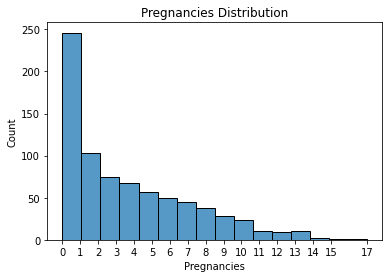

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=df, x=df[cols[0]])
plt.xticks(ticks=[i for i in df[cols[0]].unique()])
plt.show()
# sns.distplot(df[cols[0]])

In [ ]:
df.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


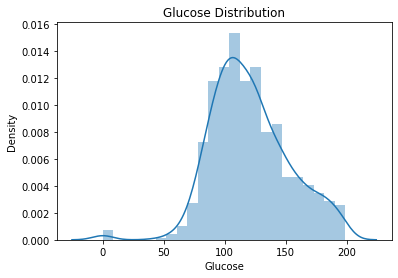

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[1]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[1]])
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


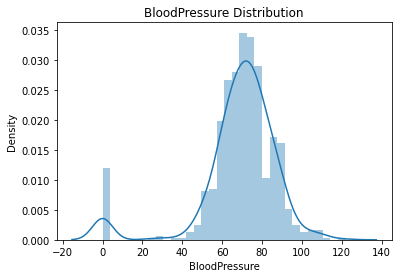

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[2]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[2]])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


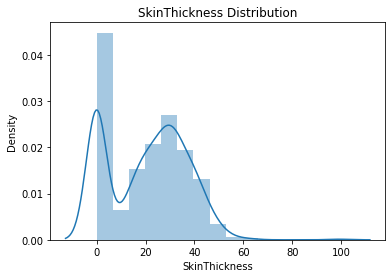

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[3]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[3]])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


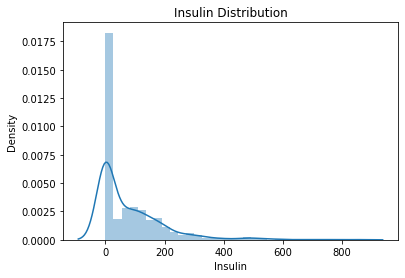

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[4]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[4]])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


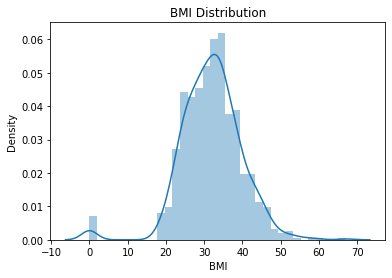

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[5]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[5]])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


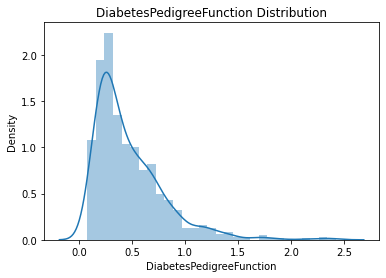

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[6]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[6]])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


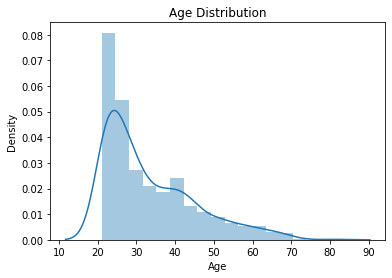

In [ ]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[7]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[7]],)
plt.show()

In [ ]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

**Observations**
1. The dataset contains more younger people.
2. The BMI of Majority of people is between 30-40 which means that majority of the people are have obesity.
3. Majority of People having insuling less than 200
4. Majority of people having Skinthickness  between 20-40
5. Majority of People having BP  between 60-80


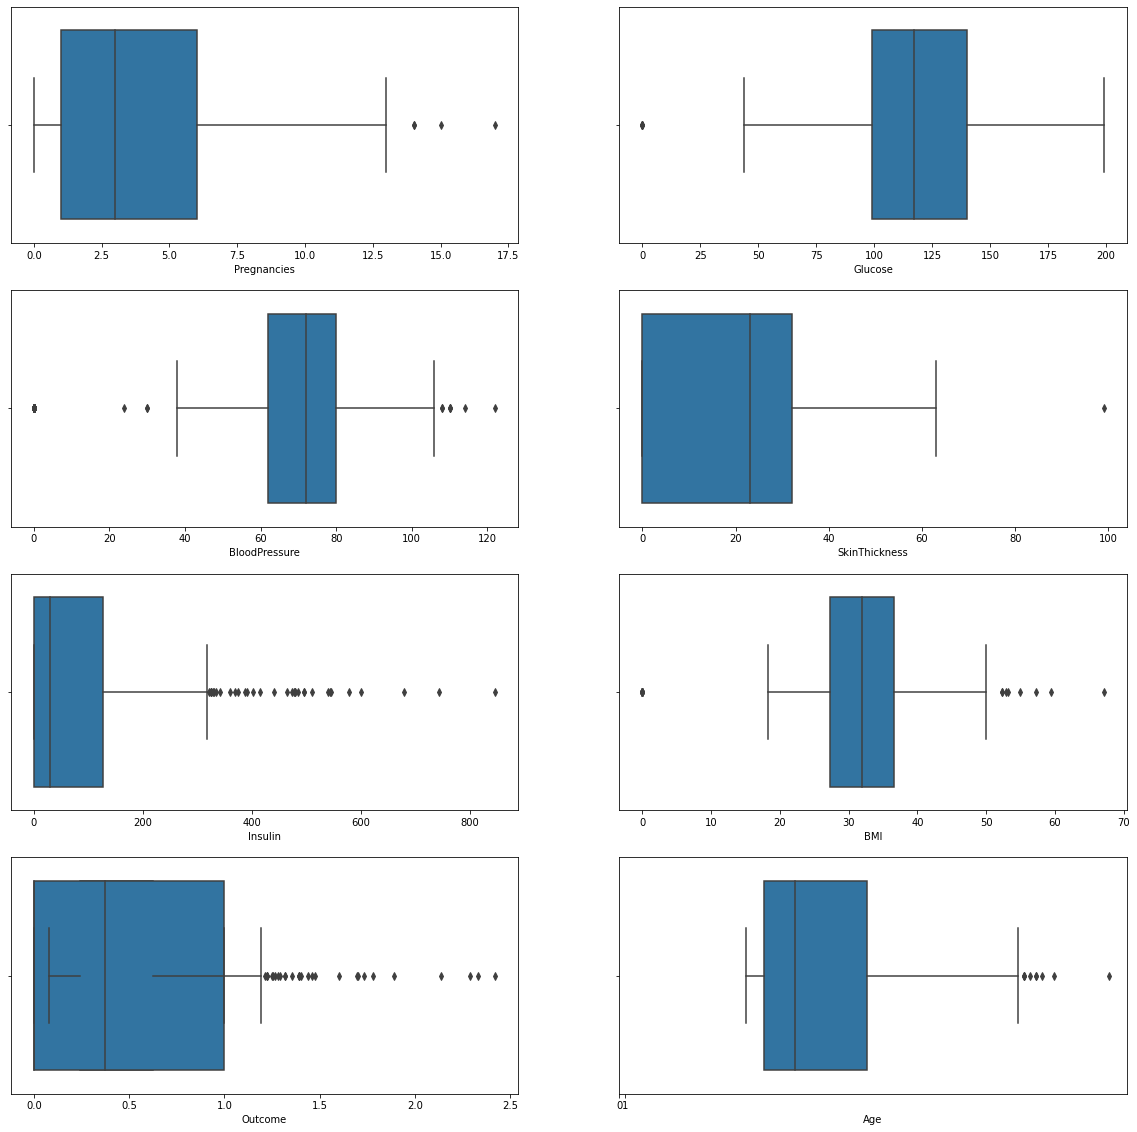

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
i = 0
j = 0
for col in cols[:]:
    sns.boxplot(x=df[col],ax=axes[i][j])
    plt.xticks(ticks=df[col].unique())

    j = j + 1

    if j >= 2:
        j = 0
        if i < 3:
            i = i + 1





In [ ]:
# handling the outliers
def detect_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1

    return df[column][(df[column] < (q1-1.5*IQR))|(df[column] > (q3 + 1.5*IQR))].tolist()



In [ ]:
def replace_outlier_with_mean(column,outliers):
    df[column] = np.where(df[column].isin(outliers),df[column].mean(),df[column])
    return df[column]

In [ ]:
pregnancy_outliers = detect_outliers(cols[0])
glucose_outliers = detect_outliers(cols[1])
bp_outliers = detect_outliers(cols[2])
skinthickness_outliers = detect_outliers(cols[3])
insulin_outliers = detect_outliers(cols[4])
bmi_outliers = detect_outliers(cols[5])
DiabetesPidigreeFunction_outliers = detect_outliers(cols[6])
age_outliers = detect_outliers(cols[7])

outliers = [pregnancy_outliers,
           glucose_outliers,
            bp_outliers,
            skinthickness_outliers,
            insulin_outliers,
            bmi_outliers,
            DiabetesPidigreeFunction_outliers,
            age_outliers
           ]

In [ ]:
for i, col in enumerate(cols[:-1]):
    df[col] = replace_outlier_with_mean(col,outliers[i])

In [ ]:
for col in cols[:-1]:
    print(f"{col}:\t {detect_outliers(col)}")

Pregnancies:	 []
Glucose:	 []
BloodPressure:	 [38.0, 106.0, 106.0, 106.0]
SkinThickness:	 []
Insulin:	 [300.0, 304.0, 284.0, 285.0, 318.0, 280.0, 278.0, 293.0, 285.0, 310.0, 277.0, 293.0, 291.0]
BMI:	 [49.7, 50.0, 49.6]
DiabetesPedigreeFunction:	 [1.114, 1.189, 1.101, 1.136, 1.127, 1.191, 1.095, 1.138, 1.159, 1.144, 1.154, 1.162, 1.174, 1.096, 1.182]
Age:	 [65.0, 66.0, 65.0, 65.0, 66.0, 66.0, 66.0]


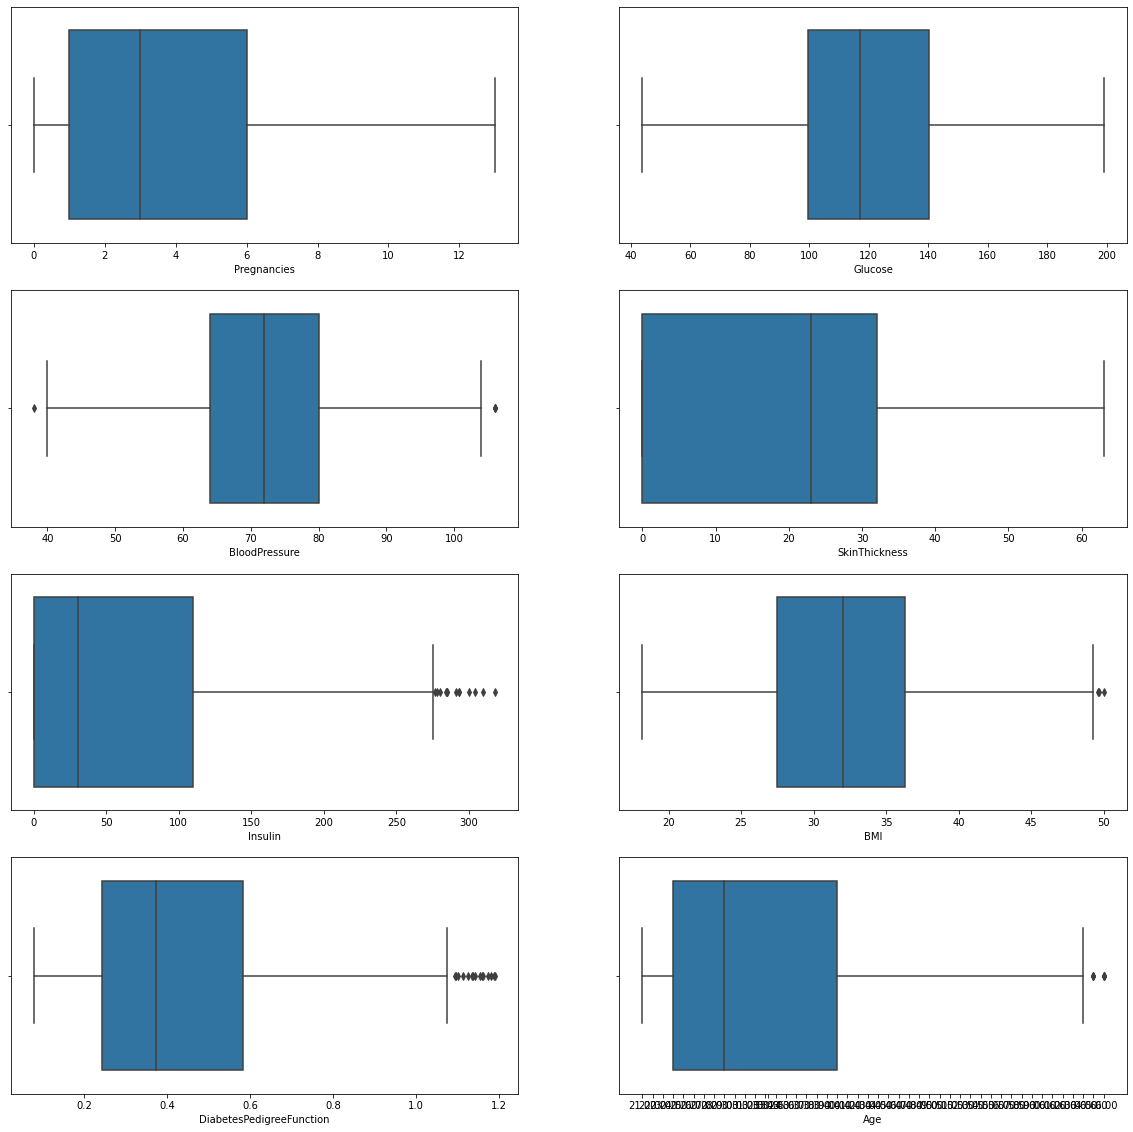

In [ ]:
def make_figures():
    fig, axes = plt.subplots(4,2,figsize=(20,20))
    i = 0
    j = 0
    for col in cols[:-1]:
        sns.boxplot(x=df[col],ax=axes[i][j])
        plt.xticks(ticks=df[col].unique())

        j = j + 1

        if j >= 2:
            j = 0
            if i < 3:
                i = i + 1


make_figures()

In [ ]:
# df['Insulin'] = replace_outlier_with_mean('Insulin',detect_outliers('Insulin'))

In [ ]:
df.describe().T.style.background_gradient(cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.786953,3.270156,0.000000,1.000000,3.000000,6.000000,13.000000
Glucose,768.000000,121.681605,30.436016,44.000000,99.750000,117.000000,140.250000,199.000000
BloodPressure,768.000000,72.027013,11.170450,38.000000,64.000000,72.000000,80.000000,106.000000
SkinThickness,768.000000,20.434292,15.698281,0.000000,0.000000,23.000000,32.000000,63.000000
Insulin,768.000000,63.101800,77.442300,0.000000,0.000000,30.500000,110.000000,318.000000
BMI,768.000000,32.198775,6.410564,18.200000,27.500000,32.000000,36.300000,50.000000
DiabetesPedigreeFunction,768.000000,0.431420,0.245050,0.078000,0.243750,0.372500,0.582250,1.191000
Age,768.000000,32.810115,11.047889,21.000000,24.000000,29.000000,40.000000,66.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


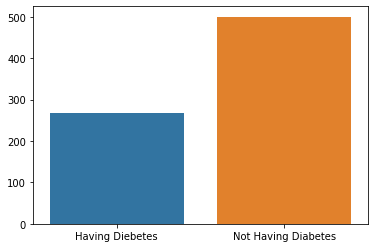

In [ ]:
having_diabetes = df[df["Outcome"]==1]
not_having = df[~(df["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],

           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(df),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(df),2)) + " %")


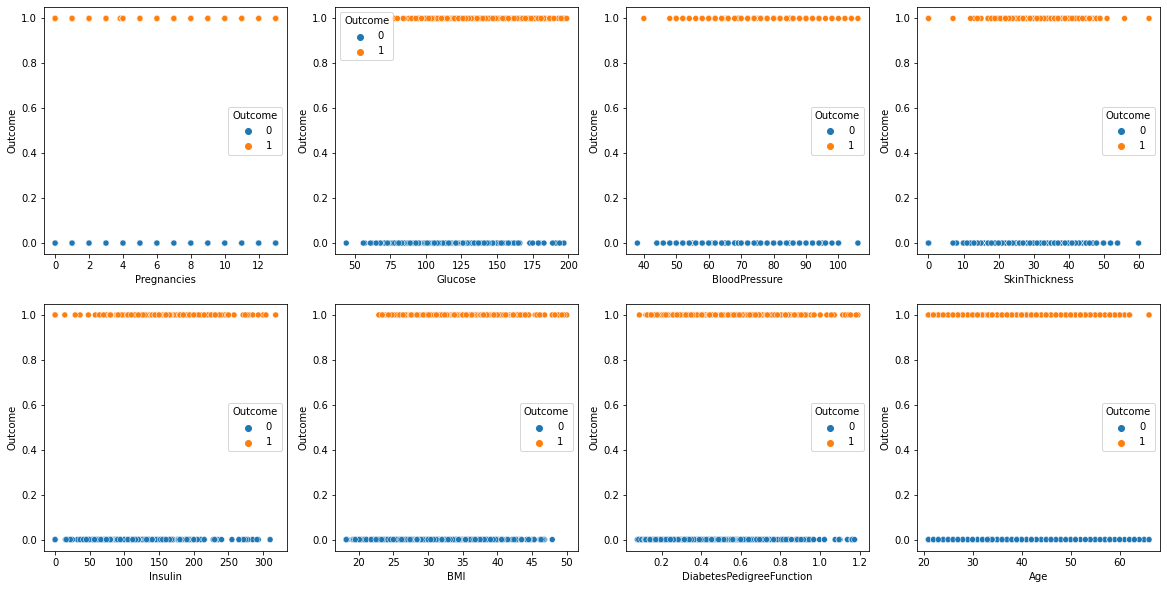

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=df,hue='Outcome',ax=ax[i][j])
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row




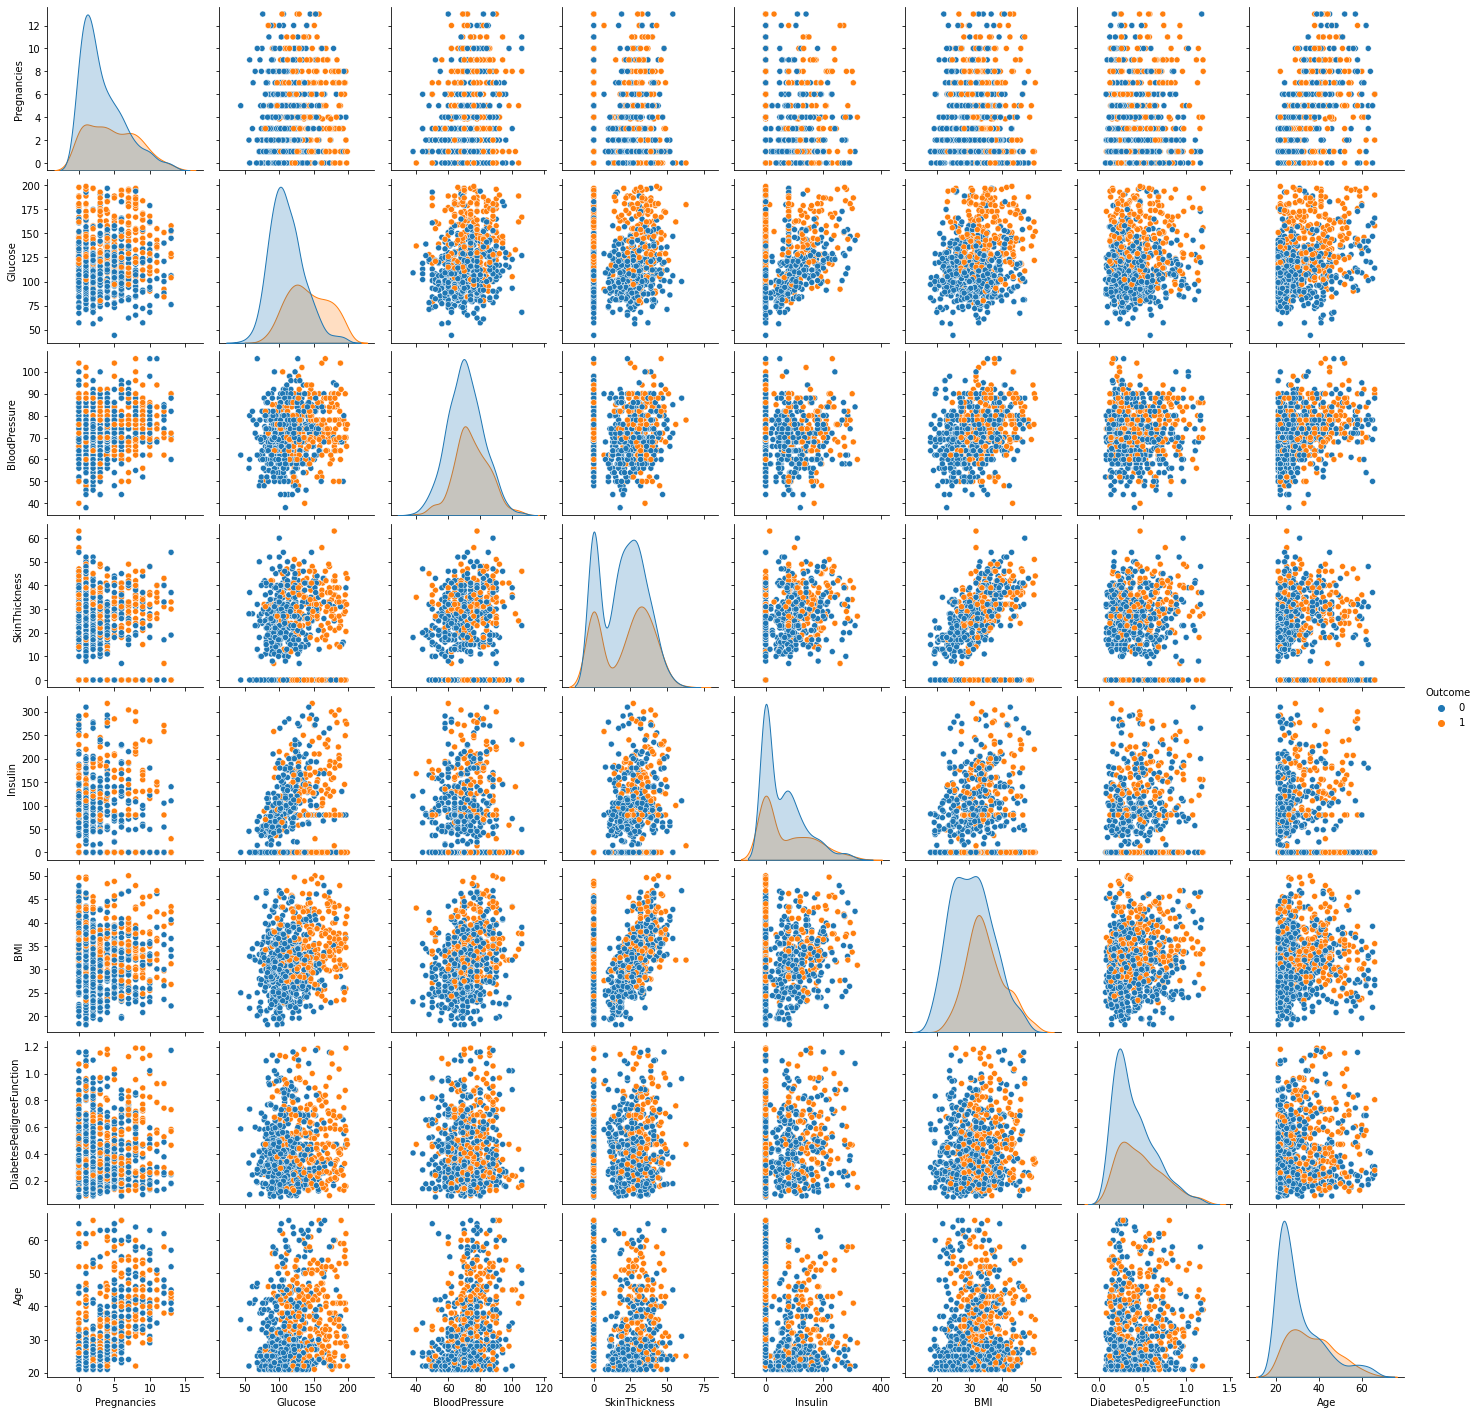

In [ ]:
sns.pairplot(data=df,hue='Outcome',hue_order=[0,1])

# **Observations**

It is clear from the above pairplot that **Glucose level plays the most important role than any other feature.**

In [ ]:
# Independant and Dependant features
X = df.drop('Outcome',axis=1)
y = df['Outcome']


In [ ]:
X.head().style.background_gradient(cmap='Set2')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000
2,8.000000,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000
4,0.000000,137.000000,40.000000,35.000000,168.000000,43.100000,0.471876,33.000000


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# **Modelling**

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=44)

# ***Logistic Regression***

In [ ]:
model = LogisticRegression(max_iter=200,fit_intercept=True)

In [ ]:
 model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.intercept_

array([-8.71704695])

In [ ]:
model.coef_

array([[ 6.11390524e-02,  3.50269324e-02, -8.06609672e-03,
        -2.03059127e-03,  2.31009195e-04,  8.39996185e-02,
         9.57774612e-01,  2.33574121e-02]])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

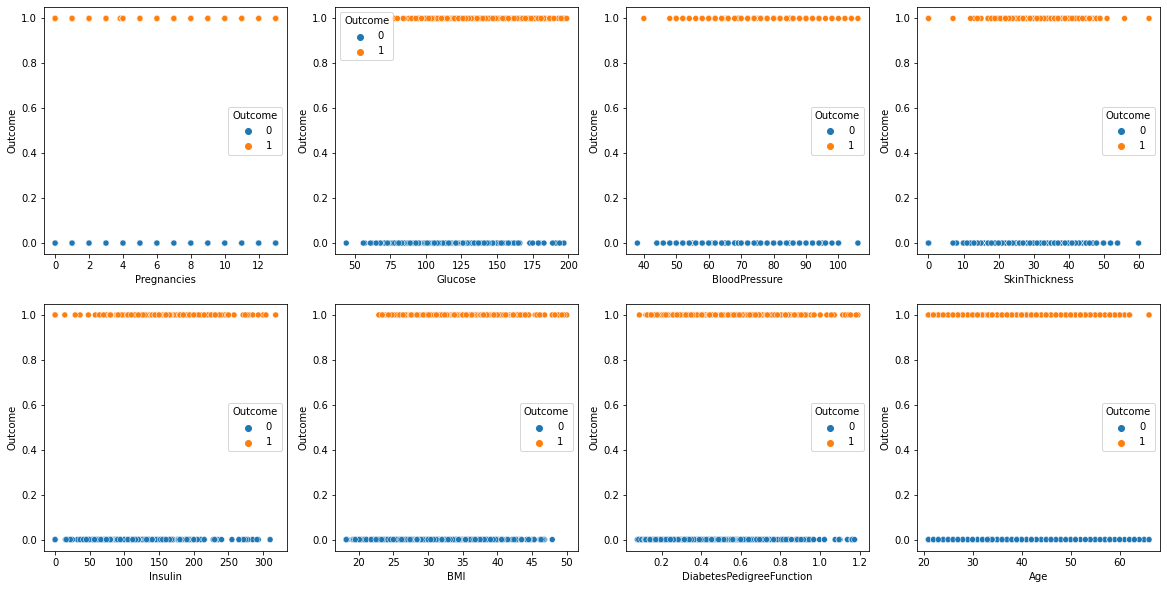

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=df,hue='Outcome',ax=ax[i][j])
     # another plot for the prediction visulization
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row



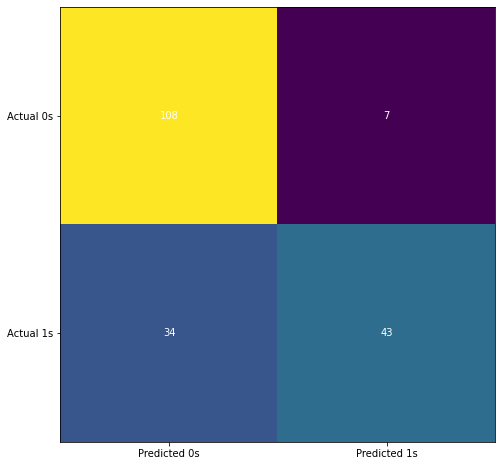

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='white')
plt.show()


In [ ]:
conf_mat

array([[108,   7],
       [ 34,  43]])

In [ ]:
correct_predictions = (conf_mat[0][0] + conf_mat[1][1])
incorrect_predictions = (conf_mat[0][1] + conf_mat[1][0])
print("Correctly Predicted:\t" + str(correct_predictions))
print("Incorrectly Predicted:\t" + str(incorrect_predictions))
print("Correctness Score Percentage:\t" + str(round(correct_predictions/np.sum(conf_mat),2)*100) + " %")

Correctly Predicted:	151
Incorrectly Predicted:	41
Correctness Score Percentage:	79.0 %


In [ ]:
round(accuracy_score(y_test,y_pred),2)

0.79

# **Model Evaluation**

In [ ]:
def calculate_precision(tp,fp):
    return tp/(tp+fp)

In [ ]:
def calculate_recall(tp,fn):
    return tp/(tp+fn)

In [ ]:
def calculte_harmonic_mean(precision,recall):
    return 2 * precision * recall/(precision + recall)

In [ ]:
def calculate_specificity(tn,fp):
    return tn/tn+fp

In [ ]:
precision = calculate_precision(conf_mat[0][0],conf_mat[1][0])
recall = calculate_recall(conf_mat[0][0],conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(conf_mat[1][1],conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7605633802816901
Recall:	0.9391304347826087
F1 Score:	0.8404669260700389
Specificity Score:	35.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       115
           1       0.86      0.56      0.68        77

    accuracy                           0.79       192
   macro avg       0.81      0.75      0.76       192
weighted avg       0.80      0.79      0.77       192



# **K Nearest Neighbours**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_pred = knn_classifier.predict(X_test)

In [ ]:
knn_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

# KNN Evaluation

In [ ]:
accuracy_score(y_test,knn_pred)
knn_conf_mat = confusion_matrix(y_test,knn_pred)
knn_conf_mat

array([[100,  15],
       [ 36,  41]])

In [ ]:
precision = calculate_precision(knn_conf_mat[0][0],knn_conf_mat[1][0])
recall = calculate_recall(knn_conf_mat[0][0],knn_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(knn_conf_mat[1][1],knn_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7352941176470589
Recall:	0.8695652173913043
F1 Score:	0.7968127490039841
Specificity Score:	37.0


In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       115
           1       0.73      0.53      0.62        77

    accuracy                           0.73       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.73      0.73      0.72       192



# Decision Trees

In [ ]:
tree_classifier = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)

In [ ]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
tree_pred = tree_classifier.predict(X_test)

In [ ]:
tree_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

In [ ]:
accuracy_score(y_test,tree_pred)

0.7864583333333334

In [ ]:
tree_conf_mat = confusion_matrix(y_test,tree_pred)
tree_conf_mat

array([[103,  12],
       [ 29,  48]])

# Decision Tree Evaluation

In [ ]:
precision = calculate_precision(tree_conf_mat[0][0],tree_conf_mat[1][0])
recall = calculate_recall(tree_conf_mat[0][0],tree_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(tree_conf_mat[1][1],tree_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7803030303030303
Recall:	0.8956521739130435
F1 Score:	0.8340080971659919
Specificity Score:	30.0


***Visualizing the Decision Tree***

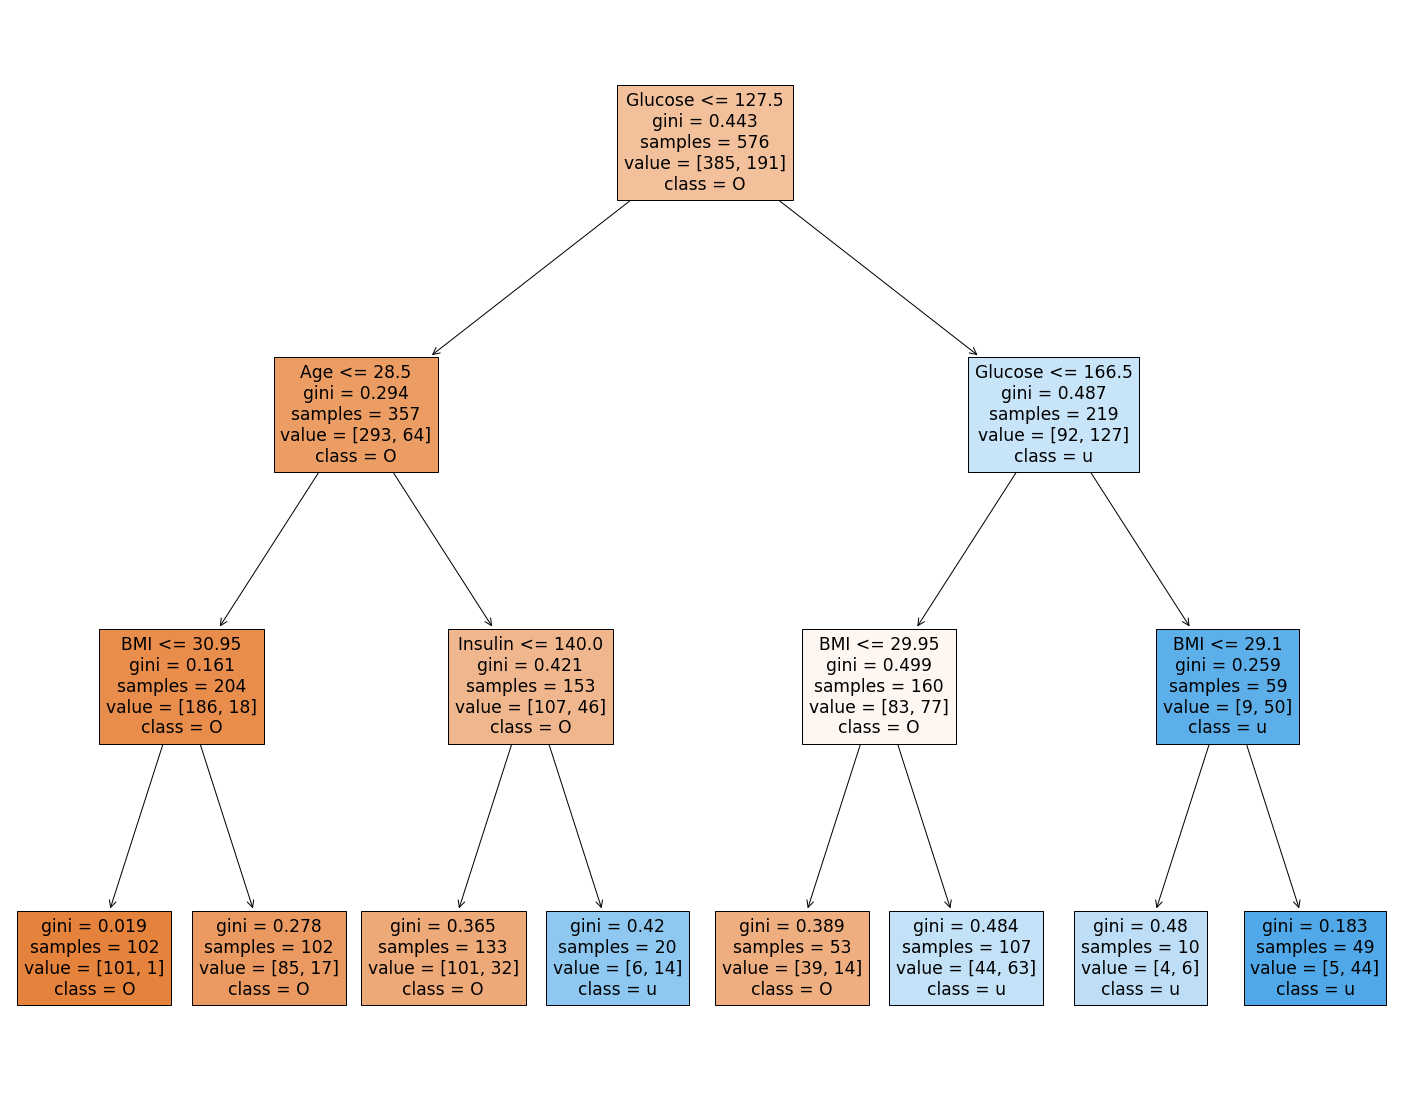

In [ ]:

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_classifier,
                   feature_names=cols[:-1],
                   class_names=cols[-1],
                   filled=True)

# RandomForest

In [ ]:
forest_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
forest_pred = forest_classifier.predict(X_test)

In [ ]:
forest_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
y_test.values

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

# RandomForest Evaluation

In [ ]:
forest_conf_mat = confusion_matrix(y_test,forest_pred)
forest_conf_mat

array([[104,  11],
       [ 37,  40]])

In [ ]:
accuracy_score(y_test,forest_pred)

0.75

In [ ]:
precision = calculate_precision(forest_conf_mat[0][0],forest_conf_mat[1][0])
recall = calculate_recall(forest_conf_mat[0][0],forest_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(forest_conf_mat[1][1],forest_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7375886524822695
Recall:	0.9043478260869565
F1 Score:	0.8125
Specificity Score:	38.0


***Visualization of Tree in RandomForest***

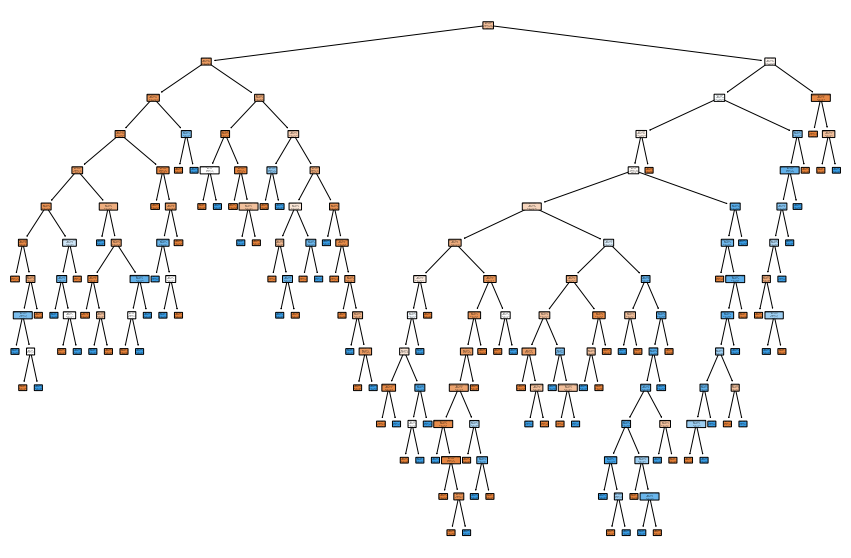

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(forest_classifier.estimators_[10],
          feature_names=cols[:-1],
          class_names=cols[-1],
          filled=True, impurity=True,
          rounded=True) # 10th tree in randomforest

In [ ]:
svm_classifier = SVC()

In [ ]:
svm_classifier.fit(X_train,y_train)

SVC()

In [ ]:
svm_pred = svm_classifier.predict(X_test)

# SVM Evaluation

In [ ]:
accuracy_score(y_test,svm_pred)

0.7395833333333334

In [ ]:
svm_conf_mat = confusion_matrix(y_test,svm_pred)
svm_conf_mat

array([[110,   5],
       [ 45,  32]])

In [ ]:
precision = calculate_precision(svm_conf_mat[0][0],svm_conf_mat[1][0])
recall = calculate_recall(svm_conf_mat[0][0],svm_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(svm_conf_mat[1][1],svm_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7096774193548387
Recall:	0.9565217391304348
F1 Score:	0.8148148148148149
Specificity Score:	46.0


# Naive Bayes Classifier- Guassian Naive Bayes

In [ ]:
naive_classifier = GaussianNB()
naive_classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
naive_pred = naive_classifier.predict(X_test)

# Naive Bayes Evaluation

In [ ]:
naive_conf_mat = confusion_matrix(y_test,naive_pred)
naive_conf_mat

array([[104,  11],
       [ 30,  47]])

In [ ]:
precision = calculate_precision(naive_conf_mat[0][0],naive_conf_mat[1][0])
recall = calculate_recall(naive_conf_mat[0][0],naive_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(naive_conf_mat[1][1],naive_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7761194029850746
Recall:	0.9043478260869565
F1 Score:	0.8353413654618472
Specificity Score:	31.0


# Gradient Boosting Classifier

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gbc_pred = GBC.predict(X_test)
gbc_conf_mat = confusion_matrix(y_test, gbc_pred)
gbc_conf_mat

array([[97, 18],
       [33, 44]])

In [ ]:
accuracy_score(y_test,gbc_pred)

0.734375

In [ ]:
precision = calculate_precision(gbc_conf_mat[0][0],gbc_conf_mat[1][0])
recall = calculate_recall(gbc_conf_mat[0][0],gbc_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(gbc_conf_mat[1][1],gbc_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7461538461538462
Recall:	0.8434782608695652
F1 Score:	0.7918367346938776
Specificity Score:	34.0


# Visualization of Performance of All Models

In [ ]:
score_df = pd.DataFrame()
score_df['Model'] = pd.Series(['Logistic Regression','KNN','DecisionTrees','RandomForest','SVM','GradientBoostingClassifier'])
score_df['Recall'] = pd.Series([calculate_recall(conf_mat[0][0],conf_mat[0][1]),
                               calculate_recall(knn_conf_mat[0][0],knn_conf_mat[0][1]),
                               calculate_recall(tree_conf_mat[0][0],tree_conf_mat[0][1]),
                                calculate_recall(forest_conf_mat[0][0],forest_conf_mat[0][1]),
                                calculate_recall(svm_conf_mat[0][0],svm_conf_mat[0][1]),
                                calculate_recall(gbc_conf_mat[0][0],gbc_conf_mat[0][1]),
                               ])
score_df["Precision"] = pd.Series([
                           calculate_precision(conf_mat[0][0],conf_mat[1][0]),
                            calculate_precision(knn_conf_mat[0][0],knn_conf_mat[1][0]),
                            calculate_precision(tree_conf_mat[0][0],tree_conf_mat[1][0]),
                            calculate_precision(forest_conf_mat[0][0],forest_conf_mat[1][0]),
                            calculate_precision(svm_conf_mat[0][0],svm_conf_mat[1][0]),
                            calculate_precision(gbc_conf_mat[0][0],gbc_conf_mat[1][0]),
])


score_df['F1 Score'] = calculte_harmonic_mean(score_df['Precision'],score_df['Recall'])
score_df['Specificity Score'] = pd.Series([
                        calculate_specificity(conf_mat[1][1],conf_mat[1][0]),
                        calculate_specificity(knn_conf_mat[1][1],knn_conf_mat[1][0]),
                        calculate_specificity(tree_conf_mat[1][1],tree_conf_mat[1][0]),
                        calculate_specificity(forest_conf_mat[1][1],forest_conf_mat[1][0]),
                        calculate_specificity(svm_conf_mat[1][1],svm_conf_mat[1][0]),
                        calculate_specificity(gbc_conf_mat[1][1],gbc_conf_mat[1][0])
])

score_df['Accuracy'] = pd.Series([
    accuracy_score(y_test,y_pred),
    accuracy_score(y_test,knn_pred),
    accuracy_score(y_test,tree_pred),
    accuracy_score(y_test,forest_pred),
    accuracy_score(y_test,svm_pred),
    accuracy_score(y_test,gbc_pred)

])


In [ ]:
score_df.style.background_gradient(cmap='bwr_r')

,Model,Recall,Precision,F1 Score,Specificity Score,Accuracy
0,Logistic Regression,0.939130,0.760563,0.840467,35.000000,0.786458
1,KNN,0.869565,0.735294,0.796813,37.000000,0.734375
2,DecisionTrees,0.895652,0.780303,0.834008,30.000000,0.786458
3,RandomForest,0.904348,0.737589,0.812500,38.000000,0.750000
4,SVM,0.956522,0.709677,0.814815,46.000000,0.739583
5,GradientBoostingClassifier,0.843478,0.746154,0.791837,34.000000,0.734375


# Final Thoughts

**From the above table it is clear that the Logistic Regression and the Decision Tree performed better than the other models**